## Numpy Crash Course

In [1]:
import numpy as np

In [6]:
array = np.array([2,4,5,8]) # Create and array
print(array)

[2 4 5 8]


There are a mess of methods on arrays. If you are familar with MATLAB, this gives you most of the power of arrays in matlab. Beyond python things like append or find the length we can do so much more.

In [5]:
print('''We can print:
array.sum()={}
array.prod()={}
array.max()={}
array.min()={}
array.mean()={}
array.std()={}
'''.format(array.sum(), 
           array.prod(), 
           array.max(), 
           array.min(), 
           array.mean(), 
           array.std()))

We can print:
array.sum()=19
array.prod()=320
array.max()=8
array.min()=2
array.mean()=4.75
array.std()=2.165063509461097



### Operations on numpy arrays

In [9]:
print("Old way with list comprehensions")
print(np.array([item*2 for item in array]))
print("New Way with numpy arrays")
print(array*2)

Old way with list comprehensions
[ 4  8 10 16]
New Way with numpy arrays
[ 4  8 10 16]


List comprehensions are much faster than for loops but much slower than numpy operations. Lets see.

In [42]:
def make_squares_for_loop(L):
    list_of_squares = []
    for num in L:
        list_of_squares.append(num**2)

def make_squares_list_comp(L):
    [i**2 for i in L]

def make_squares_numpy(L):
    L**2

In [50]:
L=range(2000)
a=np.arange(2000) # arange is numpy range 

In [51]:
%timeit make_squares_for_loop(L)

1000 loops, best of 3: 699 µs per loop


In [52]:
%timeit make_squares_list_comp(L)

1000 loops, best of 3: 608 µs per loop


In [53]:
%timeit make_squares_numpy(a)

The slowest run took 21.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.78 µs per loop


Linear algebra? Got you covered. We can automatically treat our arrays like vectors and add them as well as multiply all the elements by a scaler.

In [13]:
v = [1,2,-1]
w = [-1,0,1]
print("as python lists v+w = ", v+w)
v = np.array([1,2,-1])
w = np.array([-1,0,1])
print("as numpy arrays v+w= ", v+w)
print(v+5*w)

as python lists v+w =  [1, 2, -1, -1, 0, 1]
as numpy arrays v+w=  [0 2 0]
[-4  2  4]


### Generating some basic arrays fast

Sometimes we want need to get all the numbers from a starting point to an ending point evenly spaced.

In [15]:
eighths = np.linspace(0,1,9)
print(eighths)

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


Sometimes we want random numbers. This will give us some 10 numbers between 0,1.

In [18]:
ten_randoms = np.random.random(10)
print(ten_randoms)

[ 0.59365692  0.54220733  0.69165063  0.78569974  0.37978258  0.51221957
  0.45800697  0.30441481  0.52592007  0.41752221]


## A bit of plotting with Matplotlib

The library matplotlib has a name that sounds alot like "MATLAB". The idea was to bring to python the rapid plotting you get in MATLAB in a similar style, but in python. First lest use matplotlib in a notebook in the simpliest way possible. Please know that what I am going to show you first is not the best way but the simple way. You should not be coding this way once you know a bit. First the simple way to get figures in a jupyter notebook (different for an ipython shell) is to use the magic command "%matplotlib inline"

In [19]:
%matplotlib inline

Now we are going to import a submodule of matplotlib called pyplot that has all the basic plotting functions in it, and since we will use this alot we will give it the standard abbreviation of plt.

In [21]:
from matplotlib import pyplot as plt

Right here I am going to do something that I don't want you to do. At least not after this week. In MATLAB, and in R you do *stateful* programming. That is you issue a command, then another, then another. This will create a problem very fast here, particularly in notebooks but it does make things short so here goes. Lets plot our "eighths" list:

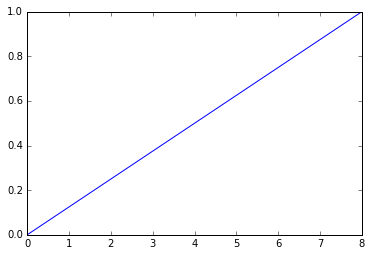

In [22]:
plt.plot(eighths)

Ok so we can't see the data because it is linear and the lines go through it so lets indicate markers

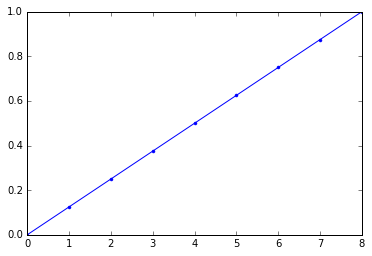

In [23]:
plt.plot(eighths,'.-')

There are 9 data points. Lets say that is the x value (rather than the index) and the y value is first 9 data points of our random array.

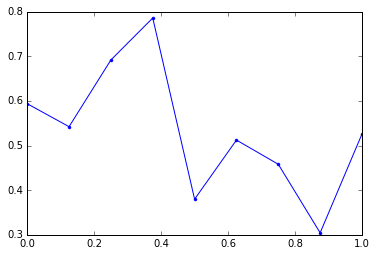

In [25]:
plt.plot(eighths,ten_randoms[:9],'.-')

One of my favorite not-so-useless demos is a random walk. If you were looking at stock prices of a company, and you take out the long term intrest you get for risk, typically the stock looks like a random walk. In other words at every step you add a random number to the stock price. Lets generate some random numbers using our simple uniform random number generator, like we did before but lets make 1000 of them.

In [27]:
stock_price_changes = np.random.random(1000) # What is the mean?
stock_price_changes.mean() # should be around .5

0.48756229749027152

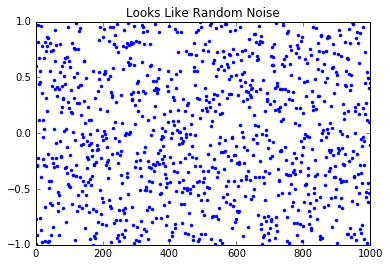

In [29]:
# Stocks can go up or down 
#so lets subtract .5 and mutiply by 2 to go from +1 to -1
stock_price_changes = (np.random.random(1000)-.5)*2
plt.plot(stock_price_changes,'.')
plt.title("Looks Like Random Noise")

Random walk says lets call each of these points a step and keep adding them. The first, then the first+ the second, etc. Some times it goes up, sometimes it goes down. Numpy has method on arrays called cumsum that actually does this.

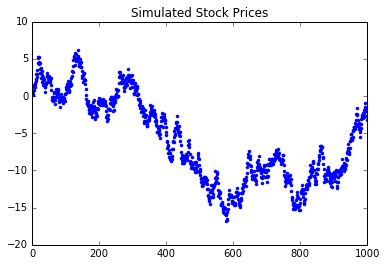

In [32]:
stock_price_changes = (np.random.random(1000)-.5)*2
stock_prices = stock_price_changes.cumsum()
plt.plot(stock_prices,'.')
plt.title("Simulated Stock Prices")

Firstly it is very imporant when ever using random to seed it. By that I mean if we run this block twice we get different answers unless we seed it.

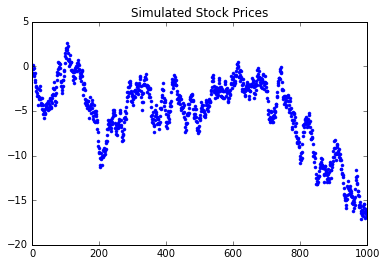

In [33]:
stock_price_changes = (np.random.random(1000)-.5)*2
stock_prices = stock_price_changes.cumsum()
plt.plot(stock_prices,'.')
plt.title("Simulated Stock Prices")

But if we use numpy.random.seed( some_seed_number) we will always get the same picture. This is essential to get reproducable work and debugging. Always seed your random numbers!!

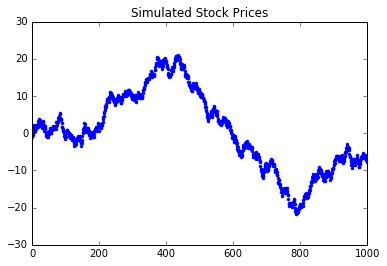

In [37]:
np.random.seed(78)
stock_price_changes = (np.random.random(1000)-.5)*2
stock_prices = stock_price_changes.cumsum()
plt.plot(stock_prices,'.')
plt.title("Simulated Stock Prices")

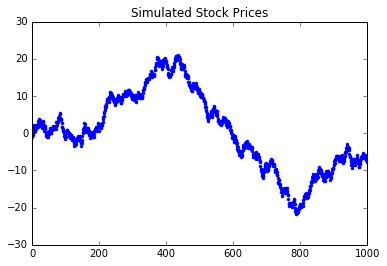

In [38]:
np.random.seed(78)
stock_price_changes = (np.random.random(1000)-.5)*2
stock_prices = stock_price_changes.cumsum()
plt.plot(stock_prices,'.')
plt.title("Simulated Stock Prices")

It is also important to always have a title, and **ALWAYS label your axes!**

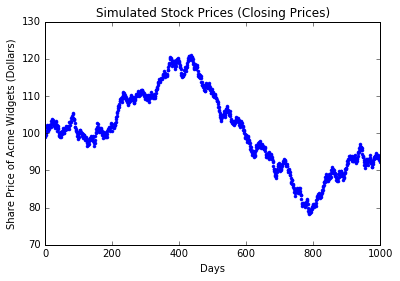

In [41]:
np.random.seed(78)
initial_price = 100 # Lets say the stock started at 100 dollars
stock_price_changes = (np.random.random(1000)-.5)*2
stock_prices = stock_price_changes.cumsum() + initial_price
plt.plot(stock_prices,'.')
plt.title("Simulated Stock Prices (Closing Prices)")
plt.xlabel("Days")
plt.ylabel("Share Price of Acme Widgets (Dollars)")

### Multidimensional Array computing PI with fancy indexing

One way to comput pi is like this. Suppose you randomly throw dots at a 2x2 square. Lets plot this using our random generator and scatter plot.

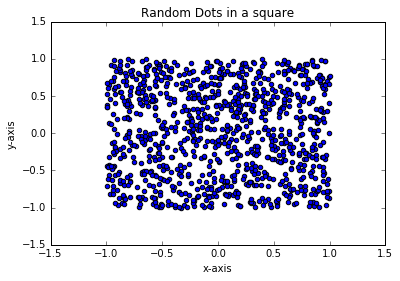

In [85]:
# Columns: x, y, Rows: NUM_DOTS instances of each point
NUM_DOTS = 1000
shape = (NUM_DOTS,2)
np.random.seed(88)
dots = np.random.random(shape)*2 - 1 # Goes from -1 to +1
plt.scatter(dots[:,0],dots[:,1])
plt.title("Random Dots in a square")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

This looks bad because we can't set the aspect ratio to be equal. Now I will show how we make figures "the right way" so we can control how they look.

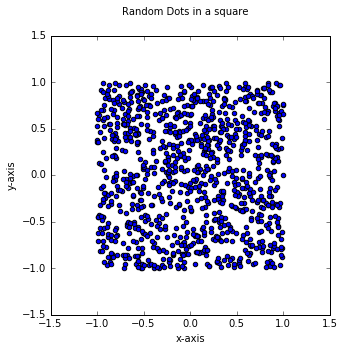

In [86]:
fig = plt.figure(figsize=(5,5)) # Set up a figure
fig.suptitle('Random Dots in a square')
ax = plt.subplot(111,aspect='equal')
ax.scatter(dots[:,0],dots[:,1])
ax.set_xlabel('x-axis')
ax.set_ylabel("y-axis")

In [88]:
radii=np.sqrt((dots**2).sum(axis=1)) # root sum of squars
inside_dots = dots[radii<=1,:] #fancy indexing
outside_dots = dots[radii>1,:] #fancy indexing

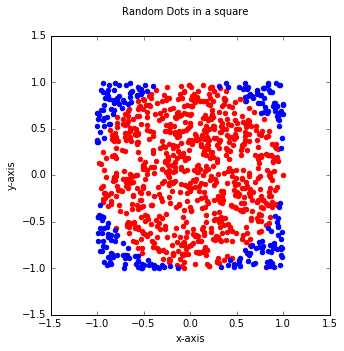

In [89]:

fig = plt.figure(figsize=(5,5)) # Set up a figure
fig.suptitle('Random Dots in a square')
ax = plt.subplot(111,aspect='equal')
ax.scatter(inside_dots[:,0],inside_dots[:,1],color='red')
ax.scatter(outside_dots[:,0],outside_dots[:,1],color='blue')
ax.set_xlabel('x-axis')
ax.set_ylabel("y-axis")

In [95]:
# Square area = 2x2 = 4
# Circle area = pi*r**2 = pi (r=1)
# Probability inside = pi/4
print('True value of pi = ', np.pi)
print('Approximation of pi = ', 4*len(inside_dots)/NUM_DOTS)

True value of pi =  3.141592653589793
Approximation of pi =  3.1464


In [96]:
#Use more dots
NUM_DOTS = 1000000
shape = (NUM_DOTS,2)
np.random.seed(88)
dots = np.random.random(shape)*2 - 1 # Goes from -1 to +1
radii=np.sqrt((dots**2).sum(axis=1)) # root sum of squars
inside_dots = dots[radii<=1,:] #fancy indexing
print('True value of pi = ', np.pi)
print('Better Approximation of pi = ', 4*len(inside_dots)/NUM_DOTS)

True value of pi =  3.141592653589793
Better Approximation of pi =  3.141496


### More numpy commands

Lets say we want to have a to create a matrix of all ones or all zeros

In [105]:
shape = (63,128)
all_ones = np.ones(shape)
all_ones

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [106]:
all_zeros = np.zeros(shape)
all_zeros

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Lets say we want to slice a subest and make a set of indices inside 1.

In [107]:
X = all_zeros[:,:]
X[16:32,64:96]=1
X # A bit hard to see

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

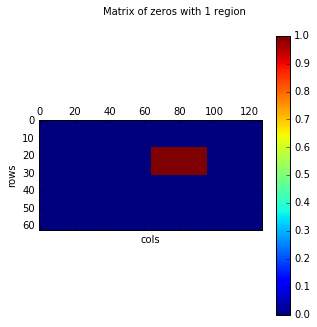

In [110]:
# lets make the matrices into images
fig = plt.figure(figsize=(5,5)) # Set up a figure
fig.suptitle('Matrix of zeros with 1 region')
ax = plt.subplot(111,aspect='equal')
m=ax.matshow(X)
ax.set_xlabel('cols')
ax.set_ylabel('rows')
fig.colorbar(m)

Rainbow color map is evil. Never use.

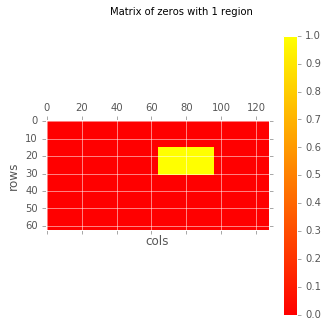

In [116]:
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'autumn'
# lets make the matrices into images
fig = plt.figure(figsize=(5,5)) # Set up a figure
fig.suptitle('Matrix of zeros with 1 region')
ax = plt.subplot(111,aspect='equal')
m=ax.matshow(X)
ax.set_xlabel('cols')
ax.set_ylabel('rows')
fig.colorbar(m)    

In [118]:
identity = np.eye(10)
print(identity)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [119]:
increasing= np.diag(np.arange(10))
print(increasing)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 9]]


In [120]:
print(np.diag(increasing))

[0 1 2 3 4 5 6 7 8 9]


### Finding type

Because the underlying libraries are in C/C++/Fortran sometimes you need to know what type. Also with big data you may want to use ints to store things more efficiently. In numpy the individual elements have a data type or dtype:

In [124]:
print(increasing[0,0].dtype) # This is an int

int64


In [125]:
new_mat = np.array(increasing,dtype='f8')

In [126]:
new_mat

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]])

In [127]:
new_mat[0,0].dtype

dtype('float64')

## Scipy

Scipy is has lots of useful libraries. The io library is good for saving and opening data in different formats. The linalg library gives you more sophisticated linear algebra operations. The stats library has huge number of statistical options.

In [128]:
from scipy import io as sio

In [133]:
sio.savemat('somematrix.mat',{'new_mat':new_mat})

In [135]:
recovered_new_mat = sio.loadmat('somematrix.mat')['new_mat']
recovered_new_mat

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]])